In [1]:
import numpy as np
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

In [2]:
holiday=pd.read_csv(r"D:\Users\PREETHI SUNDAR\Downloads\Travel.csv")
holiday

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [3]:
holiday.shape

(4888, 20)

In [4]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
holiday.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [6]:
holiday.ProdTaken.value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

# Drop Unique Columns

In [7]:
holiday_id=holiday['CustomerID']
holiday_id

0       200000
1       200001
2       200002
3       200003
4       200004
         ...  
4883    204883
4884    204884
4885    204885
4886    204886
4887    204887
Name: CustomerID, Length: 4888, dtype: int64

In [8]:
holiday1=holiday.drop(['CustomerID'],axis=1)
holiday1

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


# Cleaning Part

# Missing Value Treatment

In [9]:
holiday1.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [10]:
holiday1.Age=holiday1.Age.fillna(holiday1.Age.median())

In [11]:
holiday1.TypeofContact=holiday1.TypeofContact.fillna('Company Invited')

In [203]:
holiday.DurationOfPitch.value_counts()

9.0      483
7.0      342
8.0      333
6.0      307
16.0     274
15.0     269
14.0     253
10.0     244
13.0     223
11.0     205
12.0     195
17.0     172
30.0      95
22.0      89
31.0      83
23.0      79
18.0      75
29.0      74
32.0      74
25.0      73
21.0      73
27.0      72
26.0      72
24.0      70
35.0      66
20.0      65
28.0      61
33.0      57
19.0      57
34.0      50
36.0      44
5.0        6
126.0      1
127.0      1
Name: DurationOfPitch, dtype: int64

In [12]:
holiday1.DurationOfPitch=holiday1.DurationOfPitch.fillna(127.0)

In [13]:
holiday1.NumberOfFollowups=holiday1.NumberOfFollowups.fillna(6.0)

In [14]:
holiday1.PreferredPropertyStar=holiday1.PreferredPropertyStar.fillna(4.0)

In [15]:
holiday1.NumberOfTrips=holiday1.NumberOfTrips.fillna(22.0)

In [16]:
holiday1.NumberOfChildrenVisiting=holiday1.NumberOfChildrenVisiting.fillna(3.0)

In [17]:
holiday1.MonthlyIncome=holiday1.MonthlyIncome.fillna(holiday1.MonthlyIncome.mean())

In [18]:
holiday1.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

# Datatypes

In [19]:
holiday1.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [20]:
holiday1.TypeofContact=le.fit_transform(holiday1.TypeofContact)
holiday1.Occupation=le.fit_transform(holiday1.Occupation)
holiday1.Gender=le.fit_transform(holiday1.Gender)
holiday1.ProductPitched=le.fit_transform(holiday1.ProductPitched)
holiday1.MaritalStatus=le.fit_transform(holiday1.MaritalStatus)
holiday1.Designation=le.fit_transform(holiday1.Designation)

In [21]:
holiday1.dtypes

ProdTaken                     int64
Age                         float64
TypeofContact                 int32
CityTier                      int64
DurationOfPitch             float64
Occupation                    int32
Gender                        int32
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched                int32
PreferredPropertyStar       float64
MaritalStatus                 int32
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                   int32
MonthlyIncome               float64
dtype: object

# EDA - Exploratory Data Analysis

In [22]:
corr1=holiday1.corr()
corr1

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
ProdTaken,1.000000,-0.143753,-0.047283,0.086852,0.019335,-0.041042,0.031376,0.009627,0.108530,-0.161262,0.099497,0.147186,-0.029485,0.260844,0.051394,-0.011508,0.001310,-0.097388,-0.128092
Age,-0.143753,1.000000,0.031043,-0.012754,-0.073848,0.026969,-0.039846,0.017856,-0.000144,0.449536,-0.006440,-0.092494,0.258445,0.032398,0.017392,0.047356,0.043075,0.181700,0.459345
TypeofContact,-0.047283,0.031043,1.000000,-0.009421,-0.078313,-0.004761,0.011812,0.005522,-0.012529,0.006780,0.035043,-0.030406,0.014309,0.007981,-0.015811,0.004348,0.011121,0.006005,0.026449
CityTier,0.086852,-0.012754,-0.009421,1.000000,0.043244,0.131834,-0.037895,-0.001671,0.029266,0.141485,-0.009609,0.035707,-0.038589,0.001793,-0.042160,0.003817,0.001487,0.120852,0.050644
DurationOfPitch,0.019335,-0.073848,-0.078313,0.043244,1.000000,0.040792,0.002171,-0.122981,-0.098212,-0.064716,-0.010339,-0.030513,-0.070096,-0.009077,-0.004510,0.012717,-0.105237,-0.002302,-0.103171
Occupation,-0.041042,0.026969,-0.004761,0.131834,0.040792,1.000000,-0.012598,0.003221,-0.011612,0.034749,0.023033,-0.021764,0.015486,0.003653,-0.053928,-0.036508,-0.000929,0.027437,0.035867
Gender,0.031376,-0.039846,0.011812,-0.037895,0.002171,-0.012598,1.000000,-0.017719,-0.013782,-0.080829,-0.014504,-0.132556,0.023382,-0.030960,0.006257,-0.023223,0.002255,-0.044082,-0.051283
NumberOfPersonVisiting,0.009627,0.017856,0.005522,-0.001671,-0.122981,0.003221,-0.017719,1.000000,0.306572,-0.021631,0.036021,0.005537,0.190880,0.011177,-0.019581,0.010362,0.596265,-0.005781,0.189278
NumberOfFollowups,0.108530,-0.000144,-0.012529,0.029266,-0.098212,-0.011612,-0.013782,0.306572,1.000000,-0.002061,-0.020099,0.077423,0.122889,0.000702,0.006792,0.012805,0.266630,0.046043,0.154238
ProductPitched,-0.161262,0.449536,0.006780,0.141485,-0.064716,0.034749,-0.080829,-0.021631,-0.002061,1.000000,0.015150,-0.047460,0.200002,-0.013152,0.034038,0.070384,0.026300,0.330022,0.690438


<Axes: >

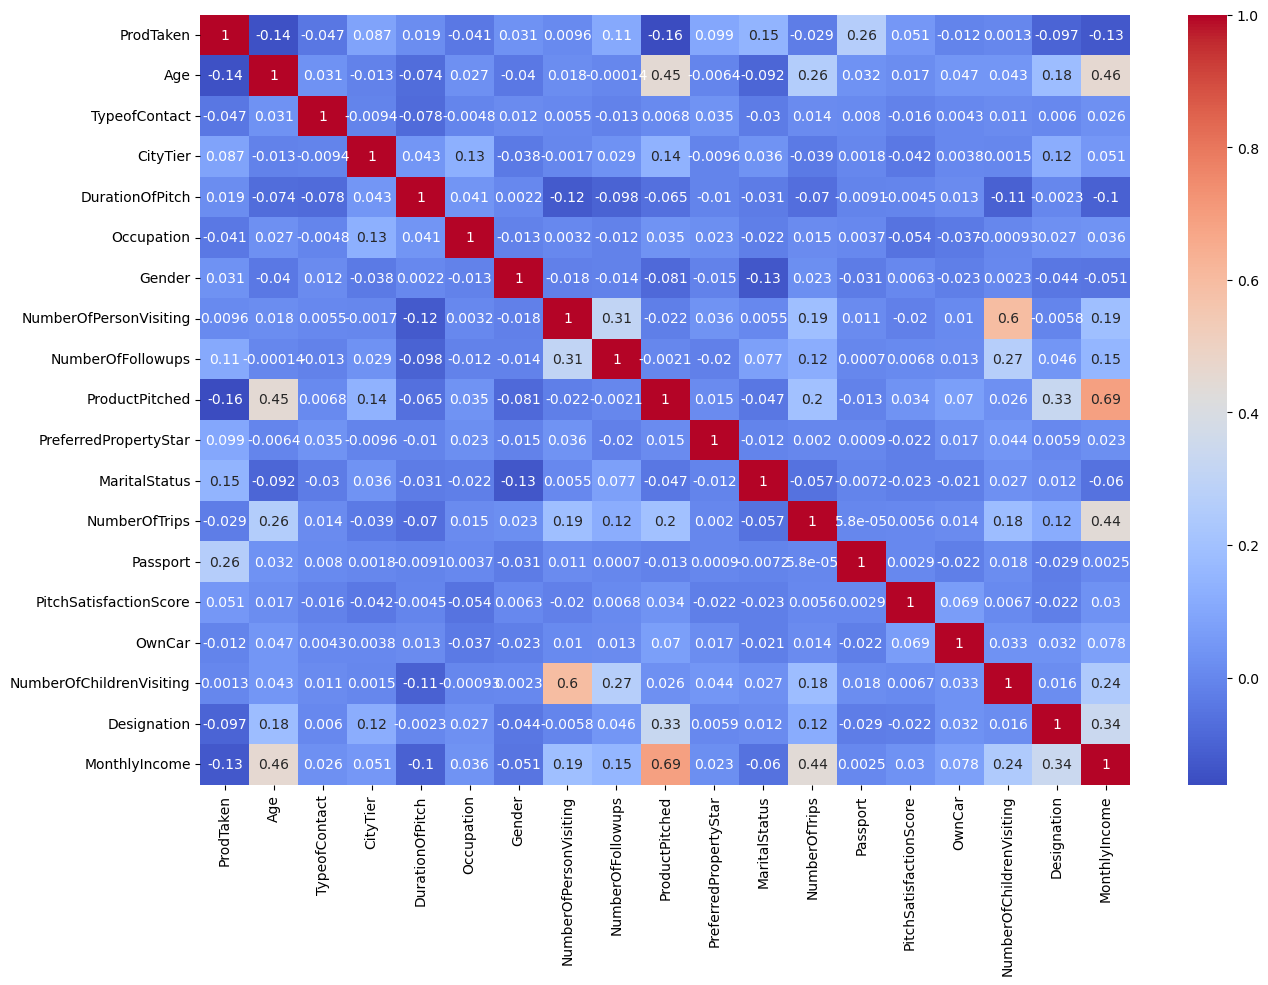

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(corr1,cmap='coolwarm',annot=True)

# Data Visualization

<Axes: xlabel='TypeofContact', ylabel='count'>

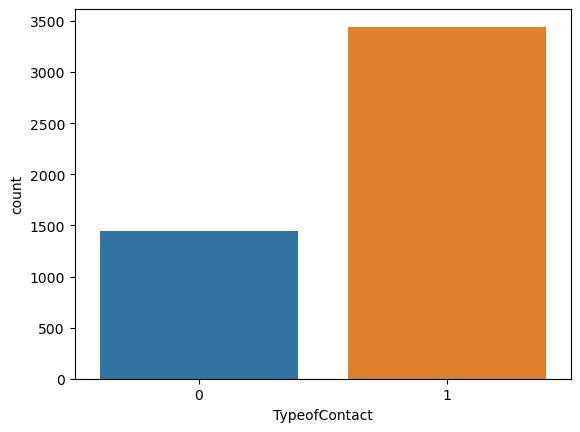

In [24]:
#TypeofContact
sns.countplot(x='TypeofContact', data=holiday1)

<Axes: xlabel='ProdTaken', ylabel='count'>

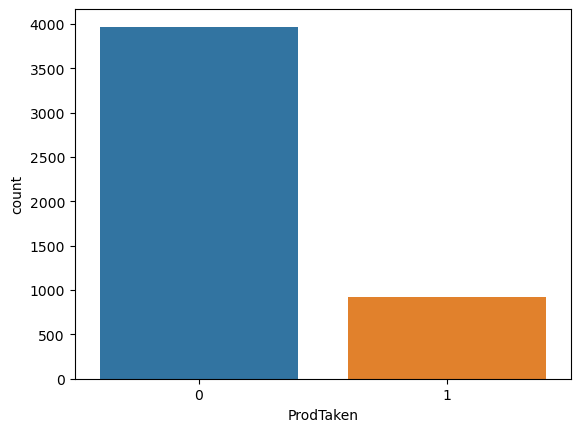

In [25]:
#ProdTaken
sns.countplot(x='ProdTaken', data=holiday1)

<Axes: xlabel='Occupation', ylabel='count'>

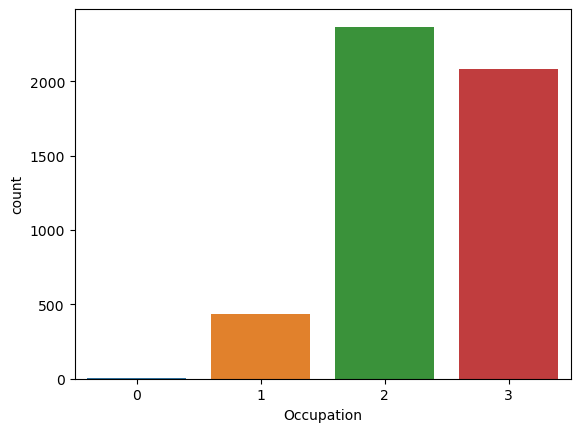

In [26]:
#Occupation
sns.countplot(x='Occupation', data=holiday1)

<Axes: xlabel='Designation', ylabel='count'>

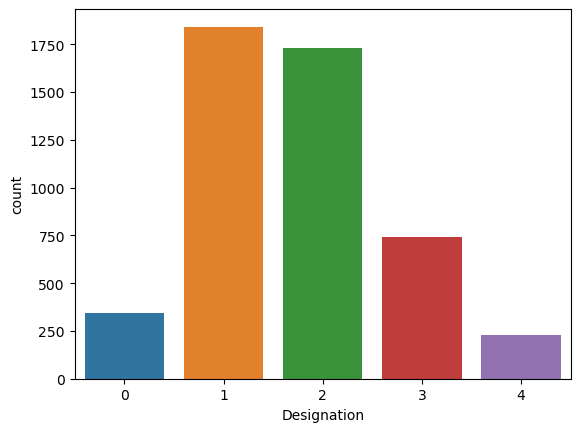

In [27]:
#Designation,
sns.countplot(x='Designation', data=holiday1)

<Axes: xlabel='ProductPitched', ylabel='count'>

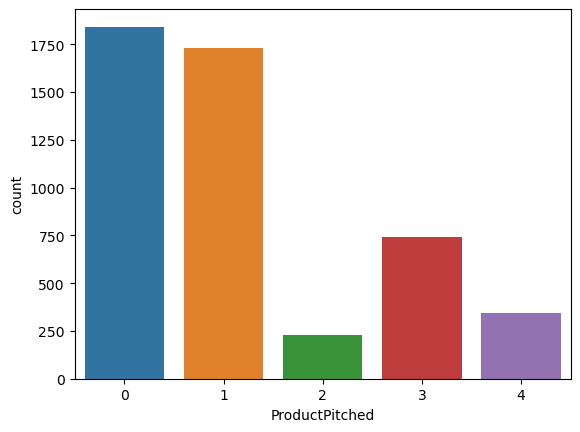

In [28]:
#ProductPitched
sns.countplot(x='ProductPitched', data=holiday1)

<Axes: xlabel='MaritalStatus', ylabel='count'>

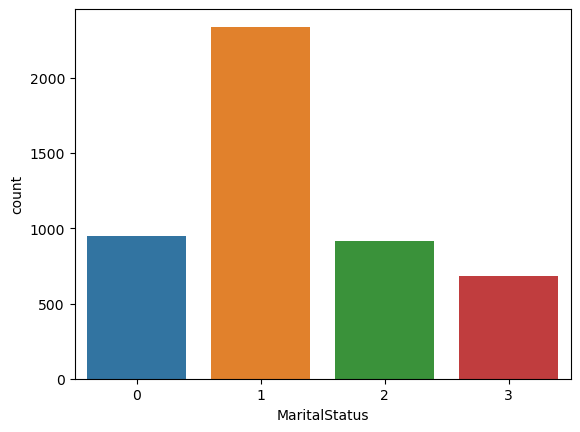

In [29]:
#MaritalStatus
sns.countplot(x='MaritalStatus', data=holiday1)

# Base Model

In [30]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#classification report
from sklearn.metrics import classification_report

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve

In [31]:
holiday1.head(2)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,1,3,6.0,2,1,3,3.0,1,3.0,2,1.0,1,2,1,0.0,2,20993.0
1,0,49.0,0,1,14.0,2,2,3,4.0,1,4.0,0,2.0,0,3,1,2.0,2,20130.0


In [32]:
x=holiday1.iloc[:,1:19]
y=holiday1.iloc[:,0]

In [33]:
x.shape,y.shape

((4888, 18), (4888,))

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [35]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3910, 18), (978, 18), (3910,), (978,))

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [37]:
lg.fit(x_train,y_train)

LogisticRegression()

In [38]:
lg_p=lg.predict(x_test)
lg_p

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [39]:
lg_m=confusion_matrix(lg_p,y_test)
lg_m

array([[782, 162],
       [  8,  26]], dtype=int64)

In [40]:
lg_acc=lg_m.diagonal().sum()/lg_m.sum()*100
lg_acc

82.61758691206545

In [41]:
lg_f1=f1_score(lg_p,y_test)
lg_f1

0.23423423423423423

In [42]:
lg_pe=precision_score(lg_p,y_test)
lg_pe

0.13829787234042554

In [43]:
lg_re=recall_score(lg_p,y_test)
lg_re

0.7647058823529411

In [44]:
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       944
           1       0.14      0.76      0.23        34

    accuracy                           0.83       978
   macro avg       0.56      0.80      0.57       978
weighted avg       0.96      0.83      0.88       978



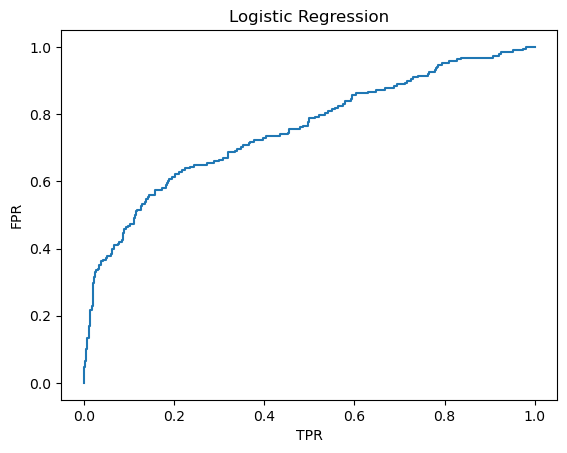

In [45]:
lg_prob=lg.predict_proba(x_test)
lg_df=pd.DataFrame(lg_prob)
lg_fpr,lg_tpr,lg_threshold=roc_curve(y_test,lg_df.iloc[:,1])
plt.plot(lg_fpr,lg_tpr)
plt.title('Logistic Regression')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

In [46]:
beda_log_precision = precision_score(y_test,lg_p)
beda_log_recall = recall_score(y_test,lg_p)
beda_log_f1score = f1_score(y_test,lg_p)

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [48]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
dt_p=dt.predict(x_test)
dt_p

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,

In [50]:
dt_cf=confusion_matrix(dt_p,y_test)
dt_cf

array([[747,  34],
       [ 43, 154]], dtype=int64)

In [51]:
dt_acc=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc

92.12678936605317

In [52]:
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       781
           1       0.82      0.78      0.80       197

    accuracy                           0.92       978
   macro avg       0.88      0.87      0.88       978
weighted avg       0.92      0.92      0.92       978



In [53]:
beda_dt_precision = precision_score(y_test,dt_p)
beda_dt_recall = recall_score(y_test,dt_p)
beda_dt_f1score = f1_score(y_test,dt_p)

# Random forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [55]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
rf_p=rf.predict(x_test)
rf_p

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [57]:
rf_cf=confusion_matrix(rf_p,y_test)
rf_cf

array([[778,  48],
       [ 12, 140]], dtype=int64)

In [58]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

93.86503067484662

In [59]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       826
           1       0.74      0.92      0.82       152

    accuracy                           0.94       978
   macro avg       0.86      0.93      0.89       978
weighted avg       0.95      0.94      0.94       978



In [60]:
beda_rf_precision = precision_score(y_test,rf_p)
beda_rf_recall = recall_score(y_test,rf_p)
beda_rf_f1score = f1_score(y_test,rf_p)

In [61]:
from sklearn.metrics import roc_curve

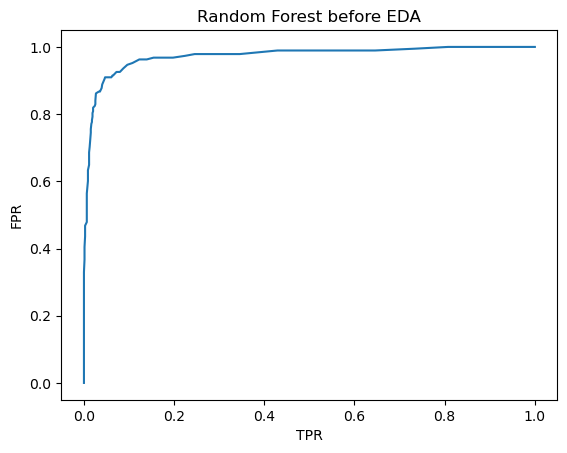

In [62]:
rf_prob=rf.predict_proba(x_test)
rf_df=pd.DataFrame(rf_prob)
rf_fpr,rf_tpr,rf_threshold=roc_curve(y_test,rf_df.iloc[:,1])
plt.plot(rf_fpr,rf_tpr)
plt.title('Random Forest before EDA')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

# Boosting Techniques

# Adaboost

In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [64]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [65]:
adbo.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [66]:
ad_p=adbo.predict(x_test)
ad_p

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,

In [67]:
ad_cf=confusion_matrix(ad_p,y_test)
ad_cf

array([[740,  30],
       [ 50, 158]], dtype=int64)

In [68]:
ad_acc=ad_cf.diagonal().sum()/ad_cf.sum()*100
ad_acc

91.8200408997955

In [69]:
print(classification_report(ad_p,y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       770
           1       0.84      0.76      0.80       208

    accuracy                           0.92       978
   macro avg       0.89      0.86      0.87       978
weighted avg       0.92      0.92      0.92       978



In [70]:
beda_ada_precision = precision_score(y_test,ad_p)
beda_ada_recall = recall_score(y_test,ad_p)
beda_ada_f1score = f1_score(y_test,ad_p)

# XG Boost

In [71]:
from xgboost import XGBClassifier

In [72]:
xgb=XGBClassifier()

In [73]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [74]:
xgb_p=xgb.predict(x_test)
xgb_p

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [75]:
xgb_cf=confusion_matrix(xgb_p,y_test)
xgb_cf

array([[775,  40],
       [ 15, 148]], dtype=int64)

In [76]:
xgb_acc=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xgb_acc

94.3762781186094

In [77]:
print(classification_report(xgb_p,y_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       815
           1       0.79      0.91      0.84       163

    accuracy                           0.94       978
   macro avg       0.88      0.93      0.90       978
weighted avg       0.95      0.94      0.95       978



In [78]:
beda_xg_precision = precision_score(y_test,xgb_p)
beda_xg_recall = recall_score(y_test,xgb_p)
beda_xg_f1score = f1_score(y_test,xgb_p)

# SVM - Support Vector Machine

In [79]:
from sklearn.svm import SVC
svc=SVC()

In [80]:
svc.fit(x_train,y_train)

SVC()

In [81]:
s_p=svc.predict(x_test)
s_p

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [82]:
cs=confusion_matrix(s_p,y_test)
cs

array([[790, 188],
       [  0,   0]], dtype=int64)

In [83]:
acc_s=cs.diagonal().sum()/cs.sum()*100
acc_s

80.77709611451944

In [84]:
print(classification_report(s_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       978
           1       0.00      0.00      0.00         0

    accuracy                           0.81       978
   macro avg       0.50      0.40      0.45       978
weighted avg       1.00      0.81      0.89       978



In [85]:
beda_svm_precision = precision_score(y_test,s_p)
beda_svm_recall = recall_score(y_test,s_p)
beda_svm_f1score = f1_score(y_test,s_p)

# Naive Bayes

In [86]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [87]:
nb.fit(x_train,y_train)

MultinomialNB()

In [88]:
n_p=nb.predict(x_test)
n_p

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [89]:
nc=confusion_matrix(n_p,y_test)
nc

array([[708, 142],
       [ 82,  46]], dtype=int64)

In [90]:
acc_n=nc.diagonal().sum()/nc.sum()*100
acc_n

77.0961145194274

In [91]:
print(classification_report(n_p,y_test))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       850
           1       0.24      0.36      0.29       128

    accuracy                           0.77       978
   macro avg       0.57      0.60      0.58       978
weighted avg       0.81      0.77      0.79       978



In [92]:
beda_nb_precision = precision_score(y_test,n_p)
beda_nb_recall = recall_score(y_test,n_p)
beda_nb_f1score = f1_score(y_test,n_p)

# Before Outlier Treatment Results

In [93]:
list1=["LogisticRegression","DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier","XGBClassifier","SVC","MultinomialNB"]
list2=[lg_m,dt_cf,rf_cf,ad_cf,xgb_cf,cs,nc]
list3=[lg_acc,dt_acc,rf_acc,ad_acc,xgb_acc,acc_s,acc_n]
list4=[beda_log_precision,beda_dt_precision,beda_rf_precision,beda_ada_precision,beda_xg_precision,beda_svm_precision,beda_nb_precision]
list5=[beda_log_recall,beda_dt_recall,beda_rf_recall,beda_ada_recall,beda_xg_recall,beda_svm_recall,beda_nb_recall]
list6=[beda_log_f1score,beda_dt_f1score,beda_rf_f1score,beda_ada_f1score,beda_xg_f1score,beda_svm_f1score,beda_nb_f1score]

In [94]:
before_eda_result=pd.DataFrame({"Model_Name":list1,"confusion_matrix":list2,"accuracy":list3,"precision":list4,"recall":list5,"f1score":list6})
before_eda_result

,Model_Name,confusion_matrix,accuracy,precision,recall,f1score
0,LogisticRegression,"[[782, 162], [8, 26]]",82.617587,0.764706,0.138298,0.234234
1,DecisionTreeClassifier,"[[747, 34], [43, 154]]",92.126789,0.781726,0.819149,0.800000
2,RandomForestClassifier,"[[778, 48], [12, 140]]",93.865031,0.921053,0.744681,0.823529
3,AdaBoostClassifier,"[[740, 30], [50, 158]]",91.820041,0.759615,0.840426,0.797980
4,XGBClassifier,"[[775, 40], [15, 148]]",94.376278,0.907975,0.787234,0.843305
5,SVC,"[[790, 188], [0, 0]]",80.777096,0.000000,0.000000,0.000000
6,MultinomialNB,"[[708, 142], [82, 46]]",77.096115,0.359375,0.244681,0.291139


# Class Imbalance Treatment

In [95]:
holiday1.ProdTaken.value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

In [96]:
c_0,c_1=holiday1["ProdTaken"].value_counts()
c_0,c_1

(3968, 920)

In [97]:
c_1,c_0

(920, 3968)

In [98]:
train_0=holiday1[holiday1["ProdTaken"]==0]
train_1=holiday1[holiday1["ProdTaken"]==1]

In [99]:
# Random oversampling

In [100]:
#class_1over=train_1.sample(c_0,replace=True)

In [101]:
#class1_0=pd.concat([class_1over,train_0],axis=0)

In [102]:
#class1_0.head()

In [103]:
#class1_0.shape  #=>output:(7936, 19)

In [104]:
#class1_0.ProdTaken.value_counts()   #output=>1 - 3968,0 - 3968

In [105]:
#If I used Random Over Sampling method my model is not getting good fit, if i use Random Undersampling techique I'm getting good fitted output.
#So I've used RANDOM UNDERSAMPLING method.

# Random Under Sampling

In [106]:
class_0under=train_0.sample(c_1)

In [107]:
class1_0=pd.concat([class_0under,train_1],axis=0)
class1_0.head(1)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3854,0,41.0,1,3,9.0,3,1,4,4.0,1,4.0,1,5.0,0,3,1,2.0,2,24355.0


In [108]:
class1_0.shape

(1840, 19)

In [109]:
class1_0.ProdTaken.value_counts()

0    920
1    920
Name: ProdTaken, dtype: int64

In [110]:
u_y=class1_0.iloc[:,0]
u_x=class1_0.iloc[:,1:19]

In [111]:
u_x_train,u_x_test,u_y_train,u_y_test=train_test_split(u_x,u_y,test_size=0.2,random_state=100)
u_x_train.shape,u_x_test.shape,u_y_train.shape,u_y_test.shape

((1472, 18), (368, 18), (1472,), (368,))

# Outlier Treatment

<Axes: >

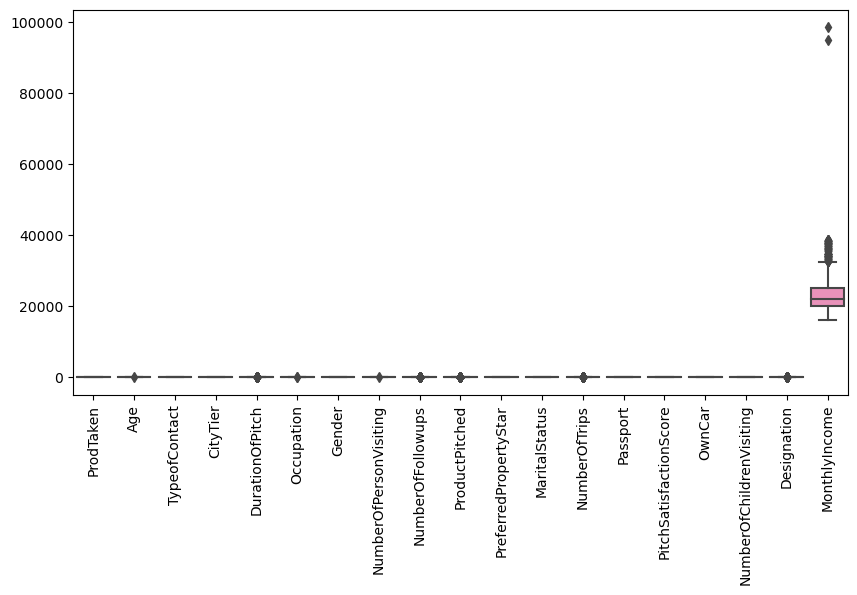

In [112]:
fig=plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(data=class1_0)

In [113]:
class1_0.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [114]:
#Occupation,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,MonthlyIncome,NumberOfTrips,Designation,DurationOfPitch

<Axes: xlabel='DurationOfPitch', ylabel='Count'>

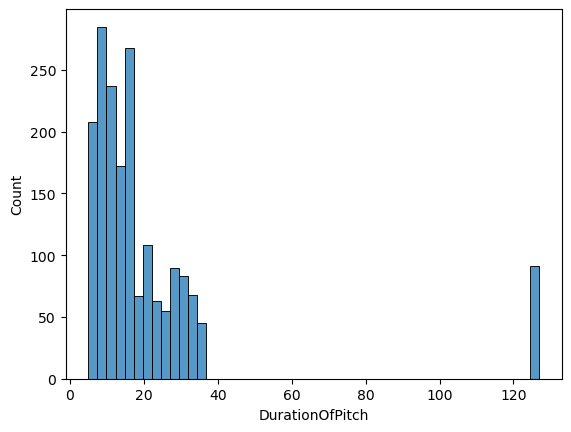

In [115]:
sns.histplot(class1_0.DurationOfPitch)

<Axes: ylabel='DurationOfPitch'>

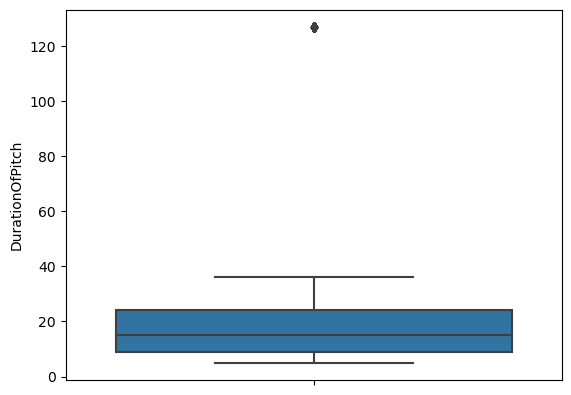

In [116]:
sns.boxplot(data=class1_0,y='DurationOfPitch')

In [117]:
class1_0.DurationOfPitch.skew()

3.5005938931797607

In [118]:
iqr=class1_0.DurationOfPitch.quantile(0.75)-class1_0.DurationOfPitch.quantile(0.25)
iqr

15.0

In [119]:
lb=class1_0.DurationOfPitch.quantile(0.25)-(iqr*3)
ub=class1_0.DurationOfPitch.quantile(0.75)+(iqr*3)
print(lb,ub)


-36.0 69.0


In [120]:
class1_0.loc[class1_0['DurationOfPitch']>65,'DurationOfPitch']=65

<Axes: xlabel='DurationOfPitch', ylabel='Count'>

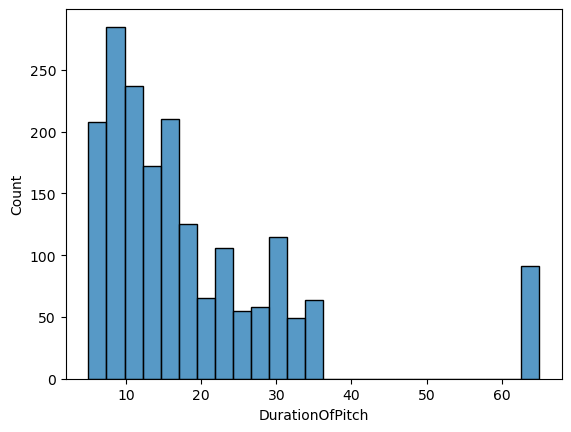

In [121]:
sns.histplot(class1_0.DurationOfPitch)

<Axes: xlabel='Occupation', ylabel='Count'>

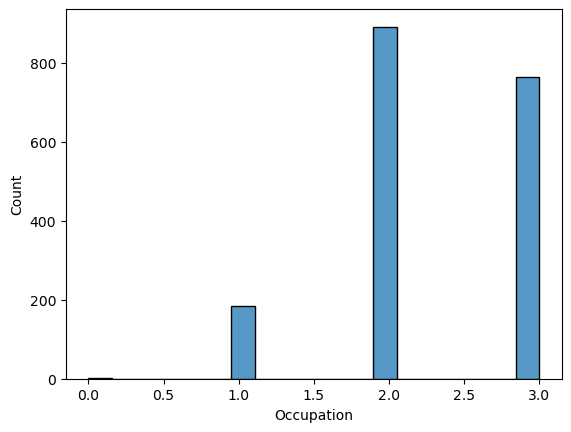

In [122]:
sns.histplot(class1_0.Occupation)

<Axes: xlabel='NumberOfPersonVisiting', ylabel='Count'>

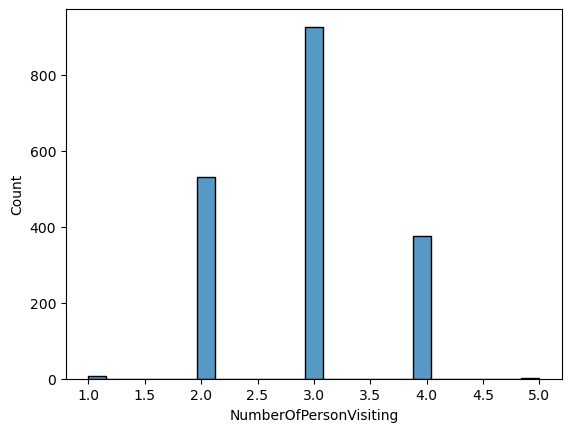

In [123]:
sns.histplot(class1_0.NumberOfPersonVisiting)

<Axes: xlabel='NumberOfFollowups', ylabel='Count'>

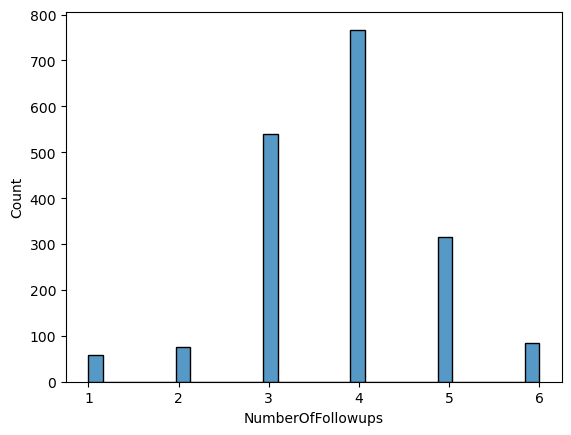

In [124]:
sns.histplot(class1_0.NumberOfFollowups)

<Axes: xlabel='ProductPitched', ylabel='Count'>

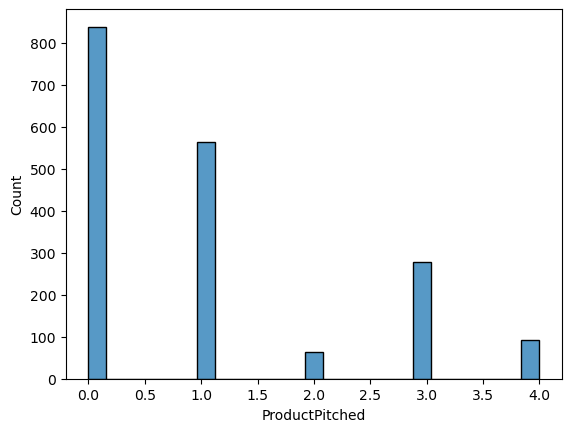

In [125]:
sns.histplot(class1_0.ProductPitched)

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

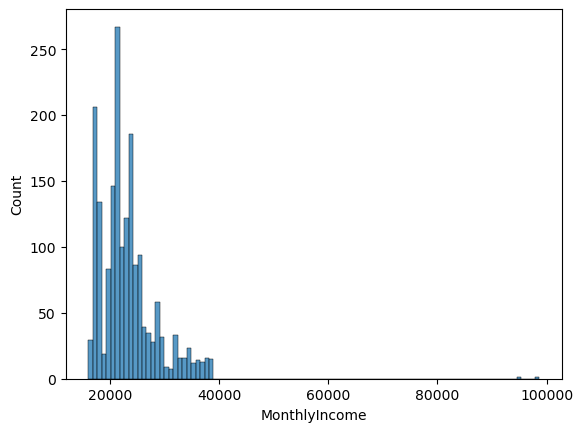

In [126]:
sns.histplot(class1_0.MonthlyIncome)

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

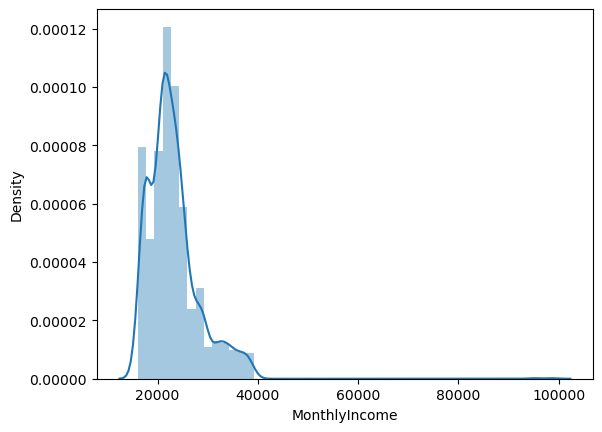

In [127]:
sns.distplot(class1_0.MonthlyIncome)

<Axes: ylabel='MonthlyIncome'>

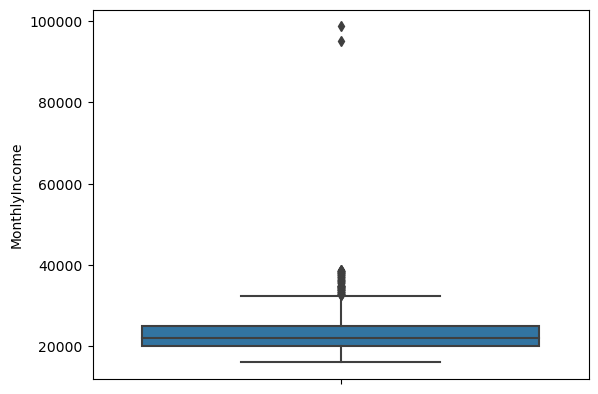

In [128]:
sns.boxplot(data=class1_0,y='MonthlyIncome')

In [129]:
class1_0.MonthlyIncome.skew()

3.4685922153612596

In [130]:
iqr=class1_0.MonthlyIncome.quantile(0.75)-class1_0.MonthlyIncome.quantile(0.25)
iqr

5039.25

In [131]:
lb=class1_0.MonthlyIncome.quantile(0.25)-(iqr*3)
ub=class1_0.MonthlyIncome.quantile(0.75)+(iqr*3)
print(lb,ub)

4873.75 40148.5


In [132]:
class1_0.loc[class1_0['MonthlyIncome']>39250.5,'MonthlyIncome']=39250.5
class1_0.loc[class1_0['MonthlyIncome']<5089,'MonthlyIncome']=5089

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

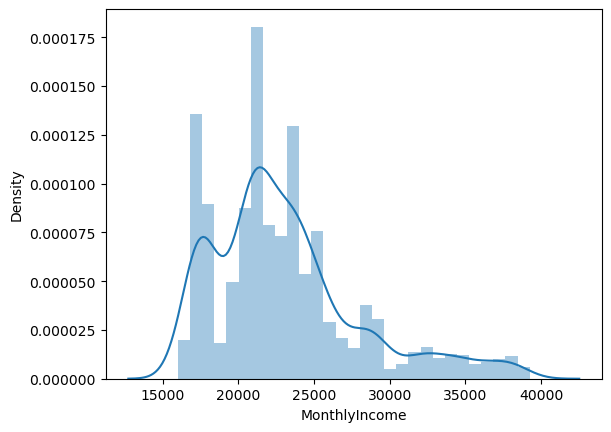

In [133]:
sns.distplot(class1_0.MonthlyIncome)

<Axes: xlabel='Designation', ylabel='Count'>

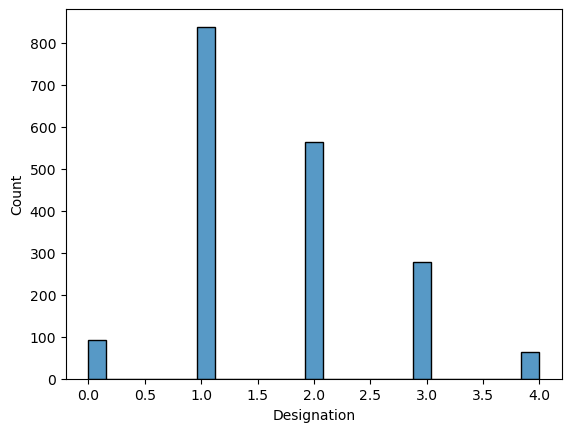

In [134]:
sns.histplot(class1_0.Designation)

<Axes: xlabel='NumberOfTrips', ylabel='Count'>

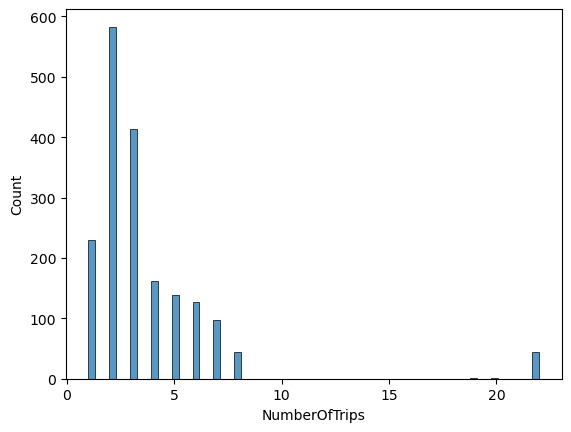

In [135]:
sns.histplot(class1_0.NumberOfTrips)

# Skewness Treatment

In [136]:
class1_0.skew()

ProdTaken                   0.000000
Age                         0.467742
TypeofContact              -0.817911
CityTier                    0.560933
DurationOfPitch             2.064481
Occupation                 -0.437508
Gender                     -0.865963
NumberOfPersonVisiting      0.075273
NumberOfFollowups          -0.253949
ProductPitched              1.036058
PreferredPropertyStar       0.751040
MaritalStatus               0.297231
NumberOfTrips               3.777966
Passport                    0.492953
PitchSatisfactionScore     -0.177783
OwnCar                     -0.464572
NumberOfChildrenVisiting    0.268636
Designation                 0.588978
MonthlyIncome               1.134138
dtype: float64

In [137]:
class1_0.loc[class1_0['DurationOfPitch']==0]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


In [138]:
class1_0.DurationOfPitch=np.log(class1_0.DurationOfPitch)

In [139]:
class1_0.MonthlyIncome=np.sqrt(class1_0.MonthlyIncome)

In [140]:
class1_0.skew()

ProdTaken                   0.000000
Age                         0.467742
TypeofContact              -0.817911
CityTier                    0.560933
DurationOfPitch             0.500131
Occupation                 -0.437508
Gender                     -0.865963
NumberOfPersonVisiting      0.075273
NumberOfFollowups          -0.253949
ProductPitched              1.036058
PreferredPropertyStar       0.751040
MaritalStatus               0.297231
NumberOfTrips               3.777966
Passport                    0.492953
PitchSatisfactionScore     -0.177783
OwnCar                     -0.464572
NumberOfChildrenVisiting    0.268636
Designation                 0.588978
MonthlyIncome               0.876882
dtype: float64

# Model After Outlier and Skewness 

In [141]:
x1=class1_0.iloc[:,1:19]
y1=class1_0.iloc[:,0]

In [142]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=100)

In [143]:
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((1472, 18), (368, 18), (1472,), (368,))

# Feature Selection - Recursive Feature Elimination

In [144]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier()

In [145]:
rfe=RFE(dTree)

In [146]:
rfe.fit(class1_0.iloc[:,1:],class1_0.iloc[:,0])

RFE(estimator=DecisionTreeClassifier())

In [147]:
rfe.support_

array([ True, False, False,  True, False, False, False, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True])

In [202]:
df=pd.DataFrame({"Score":list(rfe.support_),"columns":list(holiday1.iloc[:,1:])})
df

,Score,columns
0,True,Age
1,False,TypeofContact
2,False,CityTier
3,True,DurationOfPitch
4,False,Occupation
5,False,Gender
6,False,NumberOfPersonVisiting
7,False,NumberOfFollowups
8,True,ProductPitched
9,True,PreferredPropertyStar


In [149]:
holiday2=class1_0.drop(['TypeofContact','Occupation','Gender','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','OwnCar','NumberOfChildrenVisiting','Designation'],axis=1)
holiday2.head(2)

,ProdTaken,Age,CityTier,DurationOfPitch,ProductPitched,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,MonthlyIncome
3854,0,41.0,3,2.197225,1,1,5.0,0,3,156.060886
3999,0,57.0,1,2.639057,3,3,6.0,0,1,161.052786


In [150]:
f_x=holiday2.iloc[:,1:]
f_y=holiday2.iloc[:,0]

In [151]:
f_x.shape,f_y.shape

((1840, 9), (1840,))

In [152]:
f_x_train,f_x_test,f_y_train,f_y_test=train_test_split(f_x,f_y,test_size=0.2,random_state=100)
f_x_train.shape,f_x_test.shape,f_y_train.shape,f_y_test.shape

((1472, 9), (368, 9), (1472,), (368,))

# Model After Outlier Treatment

# Logistic Regression

In [153]:
lg.fit(x1_train,y1_train)

LogisticRegression()

In [154]:
lg_p1=lg.predict(x1_test)
lg_p1

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [155]:
lg_cf1=confusion_matrix(lg_p1,y1_test)
lg_cf1

array([[123,  59],
       [ 60, 126]], dtype=int64)

In [156]:
lg_acc1=lg_cf1.diagonal().sum()/lg_cf1.sum()*100
lg_acc1

67.66304347826086

In [157]:
print(classification_report(lg_p1,y1_test))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67       182
           1       0.68      0.68      0.68       186

    accuracy                           0.68       368
   macro avg       0.68      0.68      0.68       368
weighted avg       0.68      0.68      0.68       368



In [158]:
aeda_log_precision = precision_score(y1_test,lg_p1)
aeda_log_recall = recall_score(y1_test,lg_p1)
aeda_log_f1score = f1_score(y1_test,lg_p1)

# Decision tree

In [159]:
dt.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [160]:
dt_p1=dt.predict(x1_test)
dt_p1

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,

In [161]:
dt_cf1=confusion_matrix(dt_p1,y1_test)
dt_cf1

array([[141,  23],
       [ 42, 162]], dtype=int64)

In [162]:
dt_acc1=dt_cf1.diagonal().sum()/dt_cf1.sum()*100
dt_acc1

82.33695652173914

In [163]:
dt.feature_importances_

array([0.14697969, 0.046421  , 0.03302261, 0.09689977, 0.04305743,
       0.02117547, 0.01612029, 0.03506284, 0.05644146, 0.07130507,
       0.05908359, 0.06291156, 0.10721437, 0.08568018, 0.01190853,
       0.00529542, 0.0370365 , 0.06438423])

In [164]:
print(classification_report(dt_p1,y1_test))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       164
           1       0.88      0.79      0.83       204

    accuracy                           0.82       368
   macro avg       0.82      0.83      0.82       368
weighted avg       0.83      0.82      0.82       368



In [165]:
aeda_dt_precision = precision_score(y1_test,dt_p1)
aeda_dt_recall = recall_score(y1_test,dt_p1)
aeda_dt_f1score = f1_score(y1_test,dt_p1)

# Random Forest

In [166]:
rf.fit(x1_train,y1_train)

RandomForestClassifier()

In [167]:
rf_p1=rf.predict(x1_test)
rf_p1

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,

In [168]:
rf_cf1=confusion_matrix(rf_p1,y1_test)
rf_cf1

array([[163,  11],
       [ 20, 174]], dtype=int64)

In [169]:
rf_acc1=rf_cf1.diagonal().sum()/rf_cf1.sum()*100
rf_acc1

91.57608695652173

In [170]:
print(classification_report(rf_p1,y1_test))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       174
           1       0.94      0.90      0.92       194

    accuracy                           0.92       368
   macro avg       0.92      0.92      0.92       368
weighted avg       0.92      0.92      0.92       368



In [171]:
aeda_rf_precision = precision_score(y1_test,rf_p1)
aeda_rf_recall = recall_score(y1_test,rf_p1)
aeda_rf_f1score = f1_score(y1_test,rf_p1)

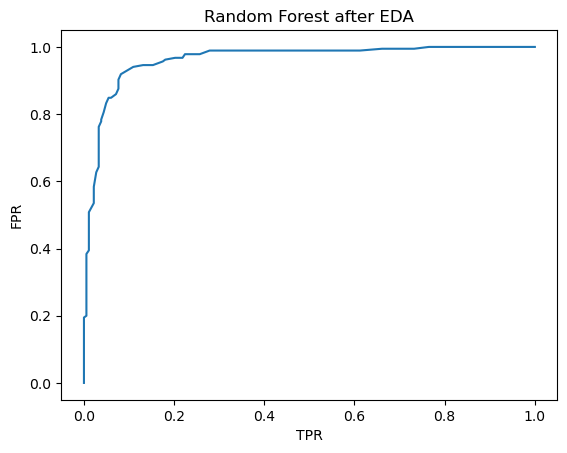

In [172]:
rf_prob1=rf.predict_proba(x1_test)
rf_df1=pd.DataFrame(rf_prob1)
rf1_fpr,rf1_tpr,rf1_threshold=roc_curve(y1_test,rf_df1.iloc[:,1])
plt.plot(rf1_fpr,rf1_tpr)
plt.title('Random Forest after EDA')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

# Adaboost

In [173]:
adbo.fit(x1_train,y1_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [174]:
ad_p1=adbo.predict(x1_test)
ad_p1

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,

In [175]:
ad_cf1=confusion_matrix(ad_p1,y1_test)
ad_cf1

array([[140,  29],
       [ 43, 156]], dtype=int64)

In [176]:
ad_acc1=ad_cf1.diagonal().sum()/ad_cf1.sum()*100
ad_acc1

80.43478260869566

In [177]:
print(classification_report(ad_p1,y1_test))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       169
           1       0.84      0.78      0.81       199

    accuracy                           0.80       368
   macro avg       0.80      0.81      0.80       368
weighted avg       0.81      0.80      0.80       368



In [178]:
aeda_ada_precision = precision_score(y1_test,ad_p1)
aeda_ada_recall = recall_score(y1_test,ad_p1)
aeda_ada_f1score = f1_score(y1_test,ad_p1)

# XG Boost

In [179]:
xgb.fit(x1_train,y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [180]:
xgb_p1=xgb.predict(x1_test)
xgb_p1

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,

In [181]:
xgb_cf1=confusion_matrix(xgb_p1,y1_test)
xgb_cf1

array([[151,   9],
       [ 32, 176]], dtype=int64)

In [182]:
xgb_acc=xgb_cf1.diagonal().sum()/xgb_cf1.sum()*100
xgb_acc

88.8586956521739

In [183]:
print(classification_report(xgb_p1,y1_test))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       160
           1       0.95      0.85      0.90       208

    accuracy                           0.89       368
   macro avg       0.89      0.89      0.89       368
weighted avg       0.90      0.89      0.89       368



In [184]:
aeda_xg_precision = precision_score(y1_test,xgb_p1)
aeda_xg_recall = recall_score(y1_test,xgb_p1)
aeda_xg_f1score = f1_score(y1_test,xgb_p1)

# SVM

In [185]:
svc.fit(x1_train,y1_train)

SVC()

In [186]:
s_p1=svc.predict(x1_test)
s_p1

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [187]:
svm_cf1=confusion_matrix(s_p1,y1_test)
svm_cf1

array([[ 97,  72],
       [ 86, 113]], dtype=int64)

In [188]:
acc_s1=svm_cf1.diagonal().sum()/svm_cf1.sum()*100
acc_s1

57.065217391304344

In [189]:
print(classification_report(s_p1,y1_test))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55       169
           1       0.61      0.57      0.59       199

    accuracy                           0.57       368
   macro avg       0.57      0.57      0.57       368
weighted avg       0.57      0.57      0.57       368



In [190]:
aeda_svm_precision = precision_score(y1_test,s_p1)
aeda_svm_recall = recall_score(y1_test,s_p1)
aeda_svm_f1score = f1_score(y1_test,s_p1)

# Naive Bayes

In [191]:
nb.fit(x1_train,y1_train)

MultinomialNB()

In [192]:
n_p1=nb.predict(x1_test)
n_p1

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [193]:
n_cf1=confusion_matrix(n_p1,y1_test)
n_cf1

array([[104,  55],
       [ 79, 130]], dtype=int64)

In [194]:
acc_n1=n_cf1.diagonal().sum()/n_cf1.sum()*100
acc_n1

63.58695652173913

In [195]:
print(classification_report(n_p1,y1_test))

              precision    recall  f1-score   support

           0       0.57      0.65      0.61       159
           1       0.70      0.62      0.66       209

    accuracy                           0.64       368
   macro avg       0.64      0.64      0.63       368
weighted avg       0.64      0.64      0.64       368



In [196]:
aeda_nb_precision = precision_score(y1_test,n_p1)
aeda_nb_recall = recall_score(y1_test,n_p1)
aeda_nb_f1score = f1_score(y1_test,n_p1)

In [197]:
from sklearn.metrics import precision_score, recall_score, f1_score

# After Outlier Treatment Results

In [198]:
list7=["LogisticRegression","DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier","XGBClassifier","SVC","MultinomialNB"]
list8=[lg_cf1,dt_cf1,rf_cf1,ad_cf1,xgb_cf1,svm_cf1,n_cf1]
list9=[lg_acc1,dt_acc1,rf_acc1,ad_acc1,xgb_acc,acc_s1,acc_n1]
list10=[aeda_log_precision,aeda_dt_precision,aeda_rf_precision,aeda_ada_precision,aeda_xg_precision,aeda_svm_precision,aeda_nb_precision]
list11=[aeda_log_recall,aeda_dt_recall,aeda_rf_recall,aeda_ada_recall,aeda_xg_recall,aeda_svm_recall,aeda_nb_recall]
list12=[aeda_log_f1score,aeda_dt_f1score,aeda_rf_f1score,aeda_ada_f1score,aeda_xg_f1score,aeda_svm_f1score,aeda_nb_f1score]

# After Outlier Treatment Results

In [199]:
after_eda_result=pd.DataFrame({"Model_Name":list7,"confusion_matrix":list8,"accuracy":list9,"precision":list10,"recall":list11,"f1score":list12})
after_eda_result

,Model_Name,confusion_matrix,accuracy,precision,recall,f1score
0,LogisticRegression,"[[123, 59], [60, 126]]",67.663043,0.677419,0.681081,0.679245
1,DecisionTreeClassifier,"[[141, 23], [42, 162]]",82.336957,0.794118,0.875676,0.832905
2,RandomForestClassifier,"[[163, 11], [20, 174]]",91.576087,0.896907,0.940541,0.918206
3,AdaBoostClassifier,"[[140, 29], [43, 156]]",80.434783,0.783920,0.843243,0.812500
4,XGBClassifier,"[[151, 9], [32, 176]]",88.858696,0.846154,0.951351,0.895674
5,SVC,"[[97, 72], [86, 113]]",57.065217,0.567839,0.610811,0.588542
6,MultinomialNB,"[[104, 55], [79, 130]]",63.586957,0.622010,0.702703,0.659898


# Before Outlier Treatment Results

In [200]:
before_eda_result

,Model_Name,confusion_matrix,accuracy,precision,recall,f1score
0,LogisticRegression,"[[782, 162], [8, 26]]",82.617587,0.764706,0.138298,0.234234
1,DecisionTreeClassifier,"[[747, 34], [43, 154]]",92.126789,0.781726,0.819149,0.800000
2,RandomForestClassifier,"[[778, 48], [12, 140]]",93.865031,0.921053,0.744681,0.823529
3,AdaBoostClassifier,"[[740, 30], [50, 158]]",91.820041,0.759615,0.840426,0.797980
4,XGBClassifier,"[[775, 40], [15, 148]]",94.376278,0.907975,0.787234,0.843305
5,SVC,"[[790, 188], [0, 0]]",80.777096,0.000000,0.000000,0.000000
6,MultinomialNB,"[[708, 142], [82, 46]]",77.096115,0.359375,0.244681,0.291139


# Graphical Representation For Good Fit Model

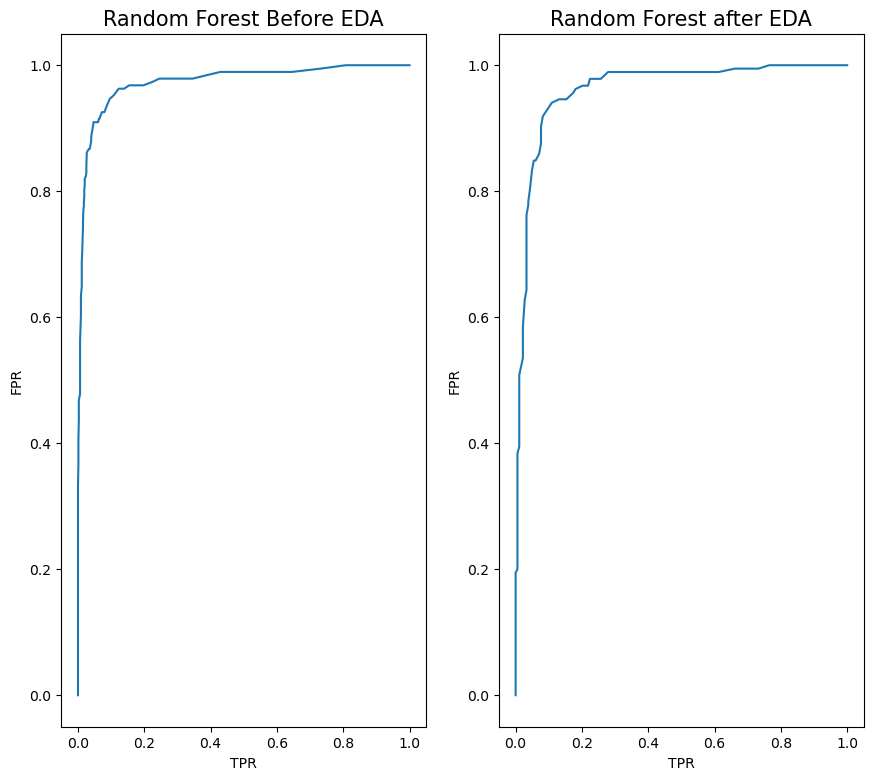

In [201]:
plt.figure(figsize=(16,9))
plt.subplot(131)
plt.plot(rf_fpr,rf_tpr)
plt.title('Random Forest Before EDA', fontsize=15)
plt.xlabel('TPR')
plt.ylabel('FPR')

plt.subplot(132)
plt.plot(rf1_fpr,rf1_tpr)
plt.title('Random Forest after EDA', fontsize=15)
plt.xlabel('TPR')
plt.ylabel('FPR')

plt.show()